In [1]:
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import bigrams
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import txtFuncts as tfs
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
# from wordcloud import STOPWORDS, ImageColorGenerator

## Reading and Cleaning

In [2]:
corpus=tfs.readCorpus('Articles')

[====================>] 100%


In [217]:
cleanCorpus=[]

for doc in corpus:
    openInds=[]
    closeInds=[]

    # Find indices of the regular expressions
    opens=re.finditer("\nDocument.+[a-z0-9]",doc)
    closes=re.finditer("[aA]ll [rR]ights [rR]eserved",doc)
    cleanDoc=''
    for i in opens:
        openInds.append(i.span())
    for i in closes:
        closeInds.append(i.span())

    # Use the expressions to extract data and exclude metadata
    i,j=0,0
    while i<len(closeInds):
        start=closeInds[i][1]+1
        
        while openInds[j][0]<start:
            j+=1
        end=openInds[j][0]-1
        cleanDoc+=doc[start:end]+' '
        i+=1
        j+=1

    cleanCorpus.append(cleanDoc)

In [218]:
dataStemmed,tokens=tfs.preprocessText(cleanCorpus,stem=True)
topk=tfs.getkMostUsed(dataStemmed,30)

dataStemmed2,tokens2=tfs.preprocessText(cleanCorpus,stem=True,removeStop=True)
topk2=tfs.getkMostUsed(dataStemmed2,30)

dataStemmed3,tokens3=tfs.preprocessText(cleanCorpus,stem=False,removeStop=True)
topk3=tfs.getkMostUsed(dataStemmed3,30)

[====================>] 100%
[====================>] 100%
[====================>] 100%


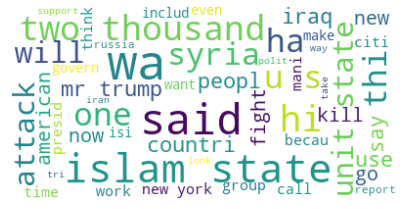

In [219]:
wordcloud=tfs.genWordCloud(dataStemmed,50)
plt.figure(figsize=(7,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

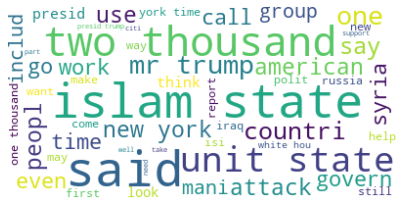

In [220]:
wordcloud=tfs.genWordCloud(dataStemmed2,50)
plt.figure(figsize=(7,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

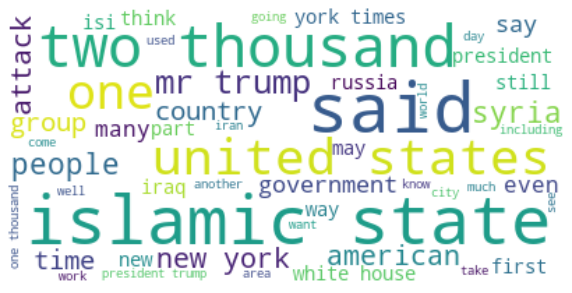

In [269]:
wordcloud=tfs.genWordCloud(dataStemmed3,50)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

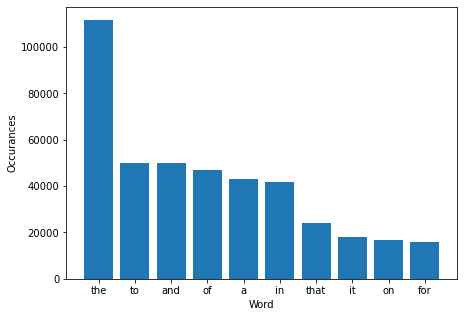

In [222]:
tfs.plotTopk(topk,10)

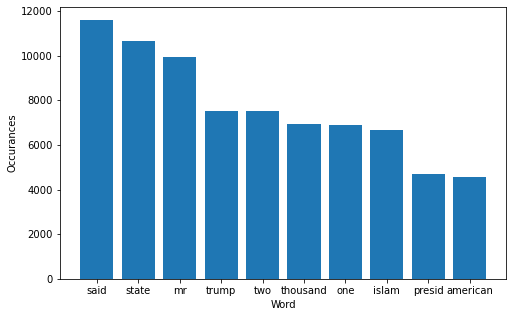

In [267]:
tfs.plotTopk(topk2,10,fwidth=8)

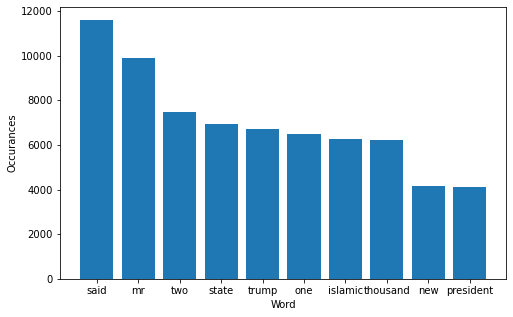

In [270]:
tfs.plotTopk(topk3,10,fwidth=8)

In [225]:
bigrams=tfs.topkBigrams(tokens3,100)

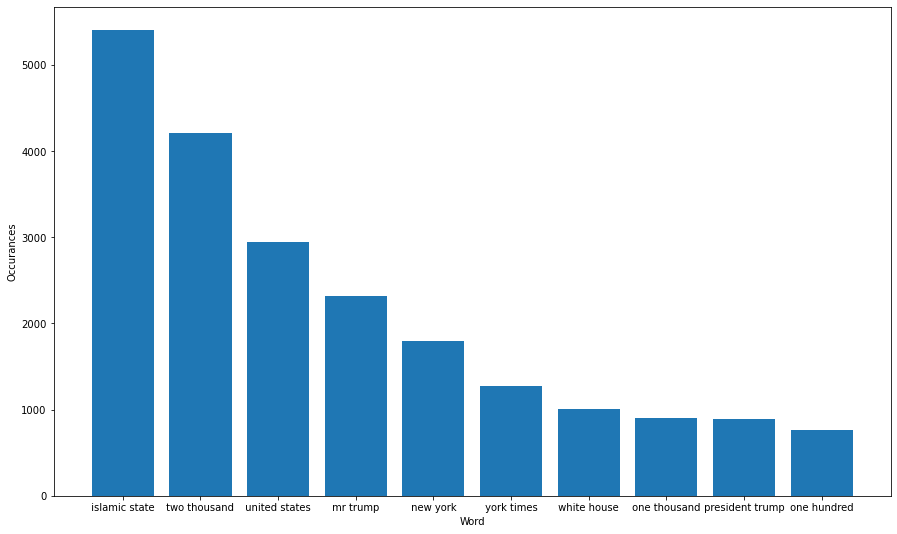

In [278]:
tfs.plotTopk(bigrams,10,fwidth=15,fheight=9)

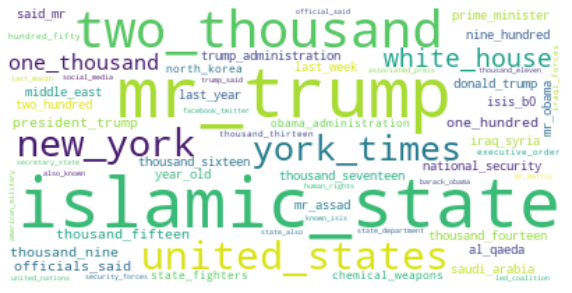

In [259]:
wordcloud=tfs.genWordCloud(bigrams,60,bigrams=True)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [231]:
len(corpus[0])-len(cleanCorpus[0])

3511

In [252]:
dataStemmed4,tokens4=tfs.preprocessText(cleanCorpus,stem=False,removeStop=True,extraWords=['thousand'])
topk4=tfs.getkMostUsed(dataStemmed4,30)

[====================>] 100%


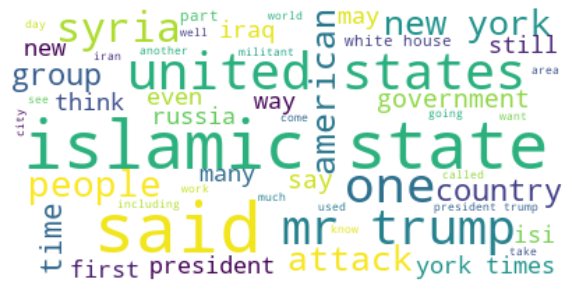

In [257]:
wordcloud=tfs.genWordCloud(dataStemmed4,50)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

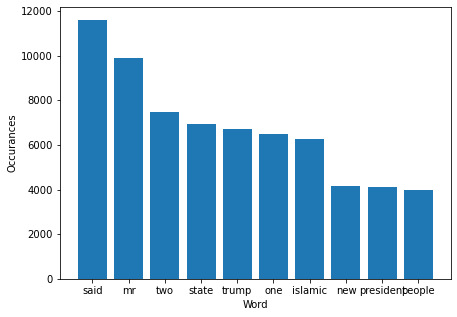

In [254]:
tfs.plotTopk(topk4,10)

In [255]:
bigrams2=tfs.topkBigrams(tokens4,100)

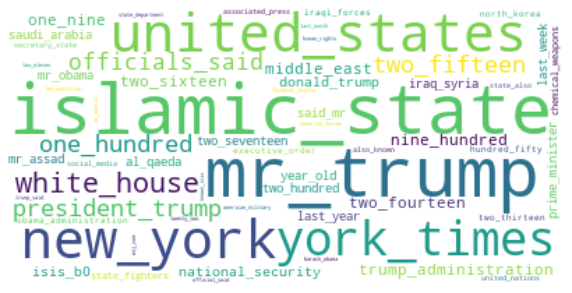

In [258]:
wordcloud=tfs.genWordCloud(bigrams2,60,bigrams=True)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()